In [8]:
# **Project Theme**: Climate Risk & Disaster Management

# **Project Title**: Cyclone Prediction For Disaster Management

# **Problem Statement**: Cyclones are one of the most destructive natural disasters, causing widespread damage to life, property, and coastal ecosystems. Accurate early prediction of cyclone
# formation is crucial for effective disaster preparedness and risk management and thus this project aims to develop a machine learning model that predicts the likelihood of cyclone
# occurrence based on environmental factors.

# **Description**:To develop a machine learning model that predicts the likelihood of cyclone occurrence based on environmental factors such as sea surface temperature,
# atmospheric pressure, humidity, wind shear, vorticity, and proximity to coastlines. By leveraging data-driven insights, the model can assist governments,
# disaster management authorities, and communities in issuing timely warnings and reducing the adverse impacts of cyclones.

In [9]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib







In [10]:
# 2. Load the dataset

df = pd.read_csv("cyclone_dataset.csv")

In [11]:
# 3. Explore the dataset
print("Data Shape:", df.shape)
print("Data Head:")
print(df.head())
print(df.head(10))
print("Dataset Info:")
print(df.info())

Data Shape: (2000, 10)
Data Head:
   Sea_Surface_Temperature  Atmospheric_Pressure   Humidity  Wind_Shear  \
0                27.498160           1008.521429  89.279758   13.979877   
1                28.404460           1001.242177  60.823380   19.548648   
2                27.216969            995.742693  77.277801    9.368437   
3                27.824280           1003.555279  67.986951   12.713517   
4                26.260206           1008.466566  98.625281   17.125960   

   Vorticity  Latitude  Ocean_Depth  Proximity_to_Coastline  \
0   0.000020  8.119890    76.137625                1.366176   
1   0.000084  9.246782   131.821235                0.683405   
2   0.000063  7.789877   181.465092                0.866362   
3   0.000061  5.929008   323.395183                0.670524   
4   0.000034  6.953442   357.904862                0.940152   

   Pre_existing_Disturbance  Cyclone  
0                         1        1  
1                         1        1  
2                  

In [12]:

print("Statistical Summary:")
print(df.describe(include='all'))

Statistical Summary:
       Sea_Surface_Temperature  Atmospheric_Pressure     Humidity  \
count              2000.000000           2000.000000  2000.000000   
mean                 26.011795           1003.390161    67.204883   
std                   2.695970             12.021871    17.727458   
min                  20.014982            980.033363    30.015487   
25%                  24.074962            994.466175    55.188218   
50%                  26.662512           1004.708218    68.635351   
75%                  28.049755           1012.159534    78.975341   
max                  29.997655           1024.986477    99.955704   

        Wind_Shear    Vorticity     Latitude  Ocean_Depth  \
count  2000.000000  2000.000000  2000.000000  2000.000000   
mean     16.129547     0.000039    20.057002  1433.043855   
std       6.221843     0.000026     7.528196  1524.801300   
min       5.010753     0.000001     5.004541    50.005236   
25%      11.413949     0.000018    15.222078   261.7

In [13]:
print("Missing Values:")
print(df.isnull().sum())
print("\nTotal Missing Values Count:",df.isnull().sum().sum())

Missing Values:
Sea_Surface_Temperature     0
Atmospheric_Pressure        0
Humidity                    0
Wind_Shear                  0
Vorticity                   0
Latitude                    0
Ocean_Depth                 0
Proximity_to_Coastline      0
Pre_existing_Disturbance    0
Cyclone                     0
dtype: int64

Total Missing Values Count: 0


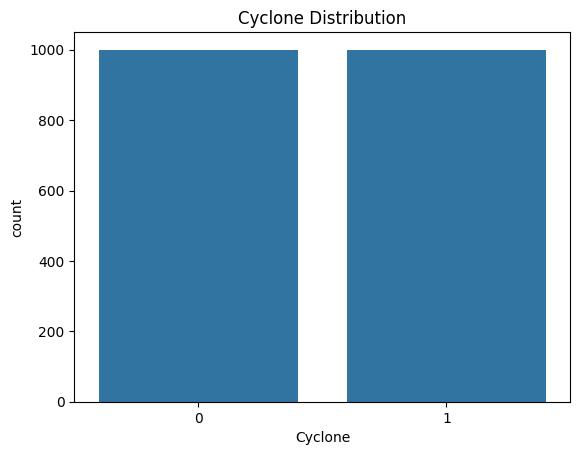

In [14]:
# Univarient Analysis
sns.countplot(x='Cyclone', data=df)
plt.title('Cyclone Distribution')
plt.show()

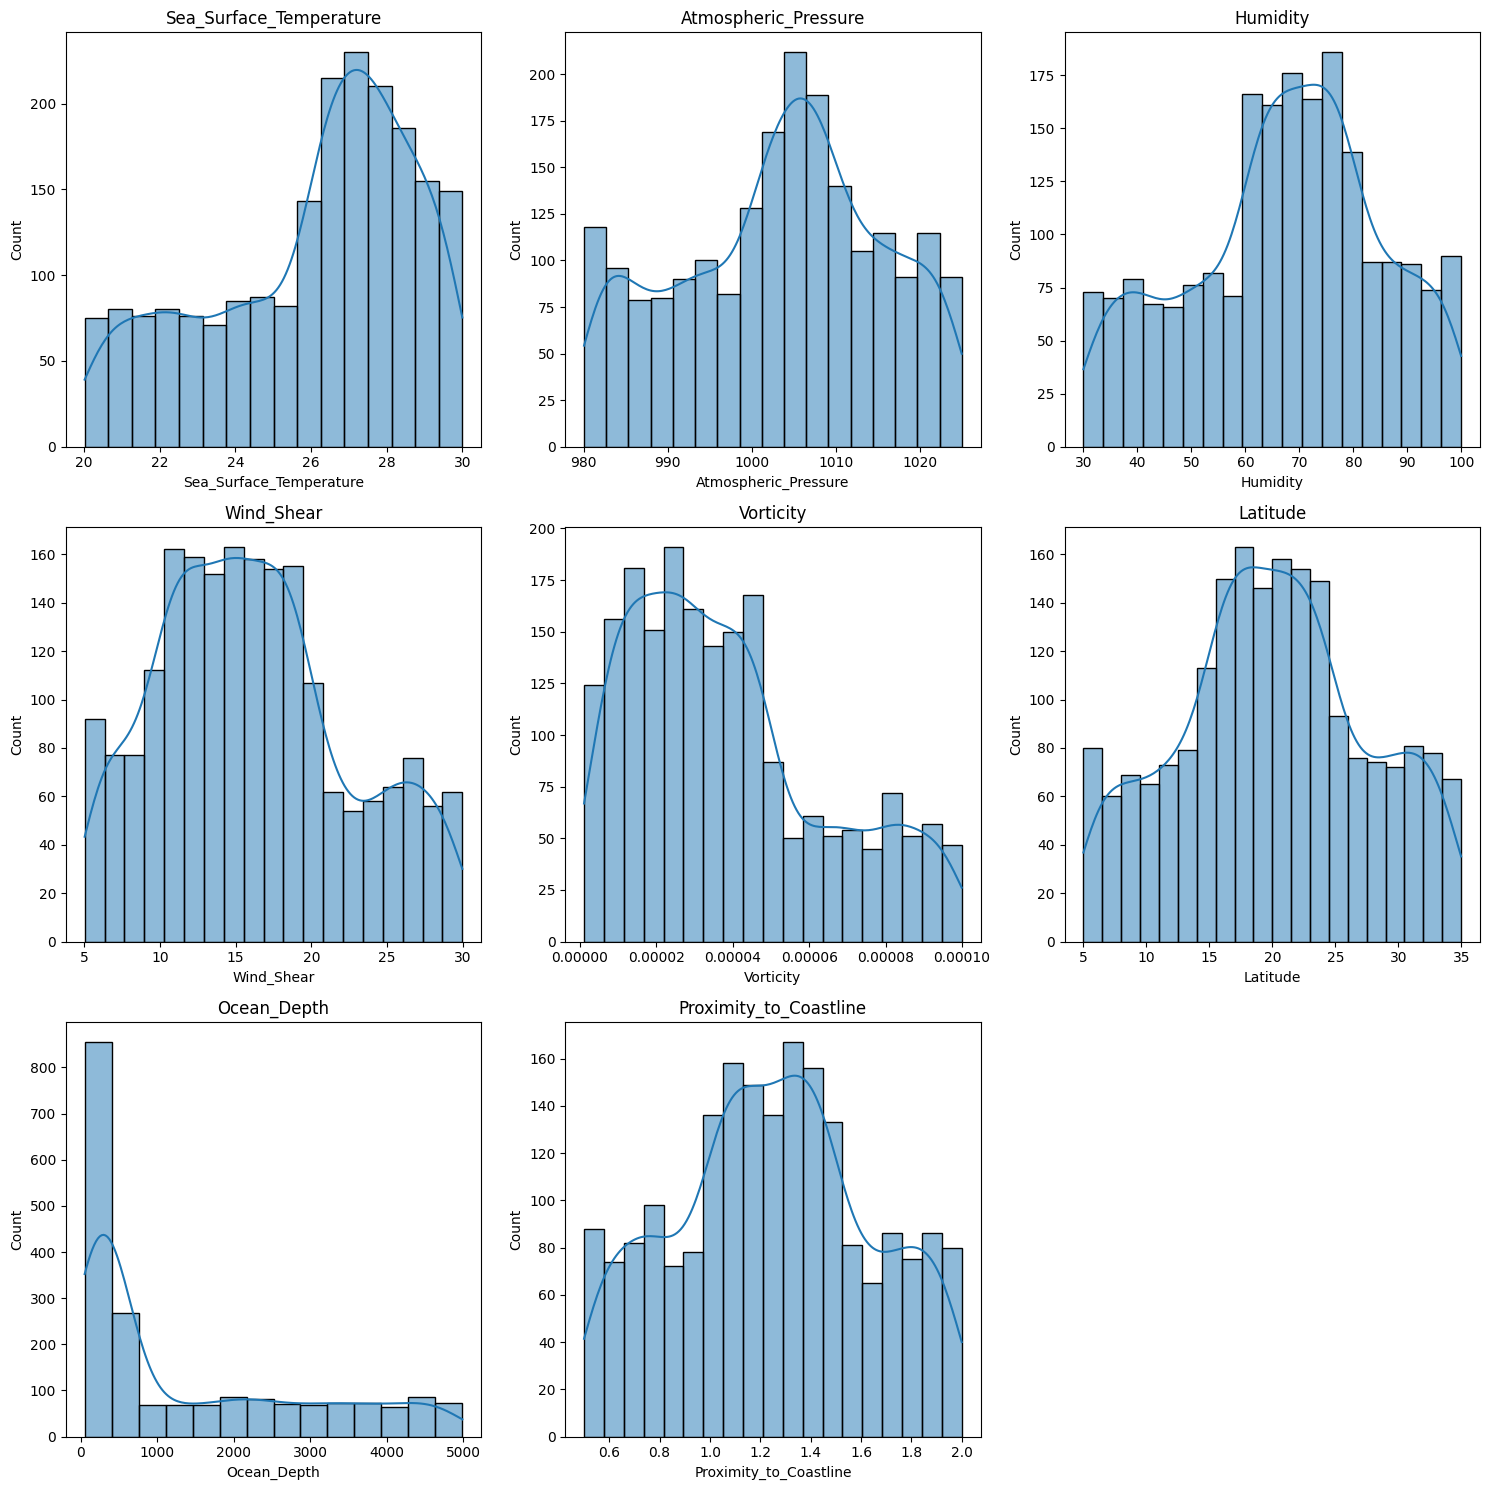

In [15]:
# Distributions of numerical features
num_cols = ['Sea_Surface_Temperature', 'Atmospheric_Pressure', 'Humidity', 'Wind_Shear', 'Vorticity', 'Latitude', 'Ocean_Depth', 'Proximity_to_Coastline']
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols # Calculate number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(num_cols):
  sns.histplot(df[col], kde=True, ax=axes[i])
  axes[i].set_title(col)

# Hide any unused subplots
for j in range(len(num_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

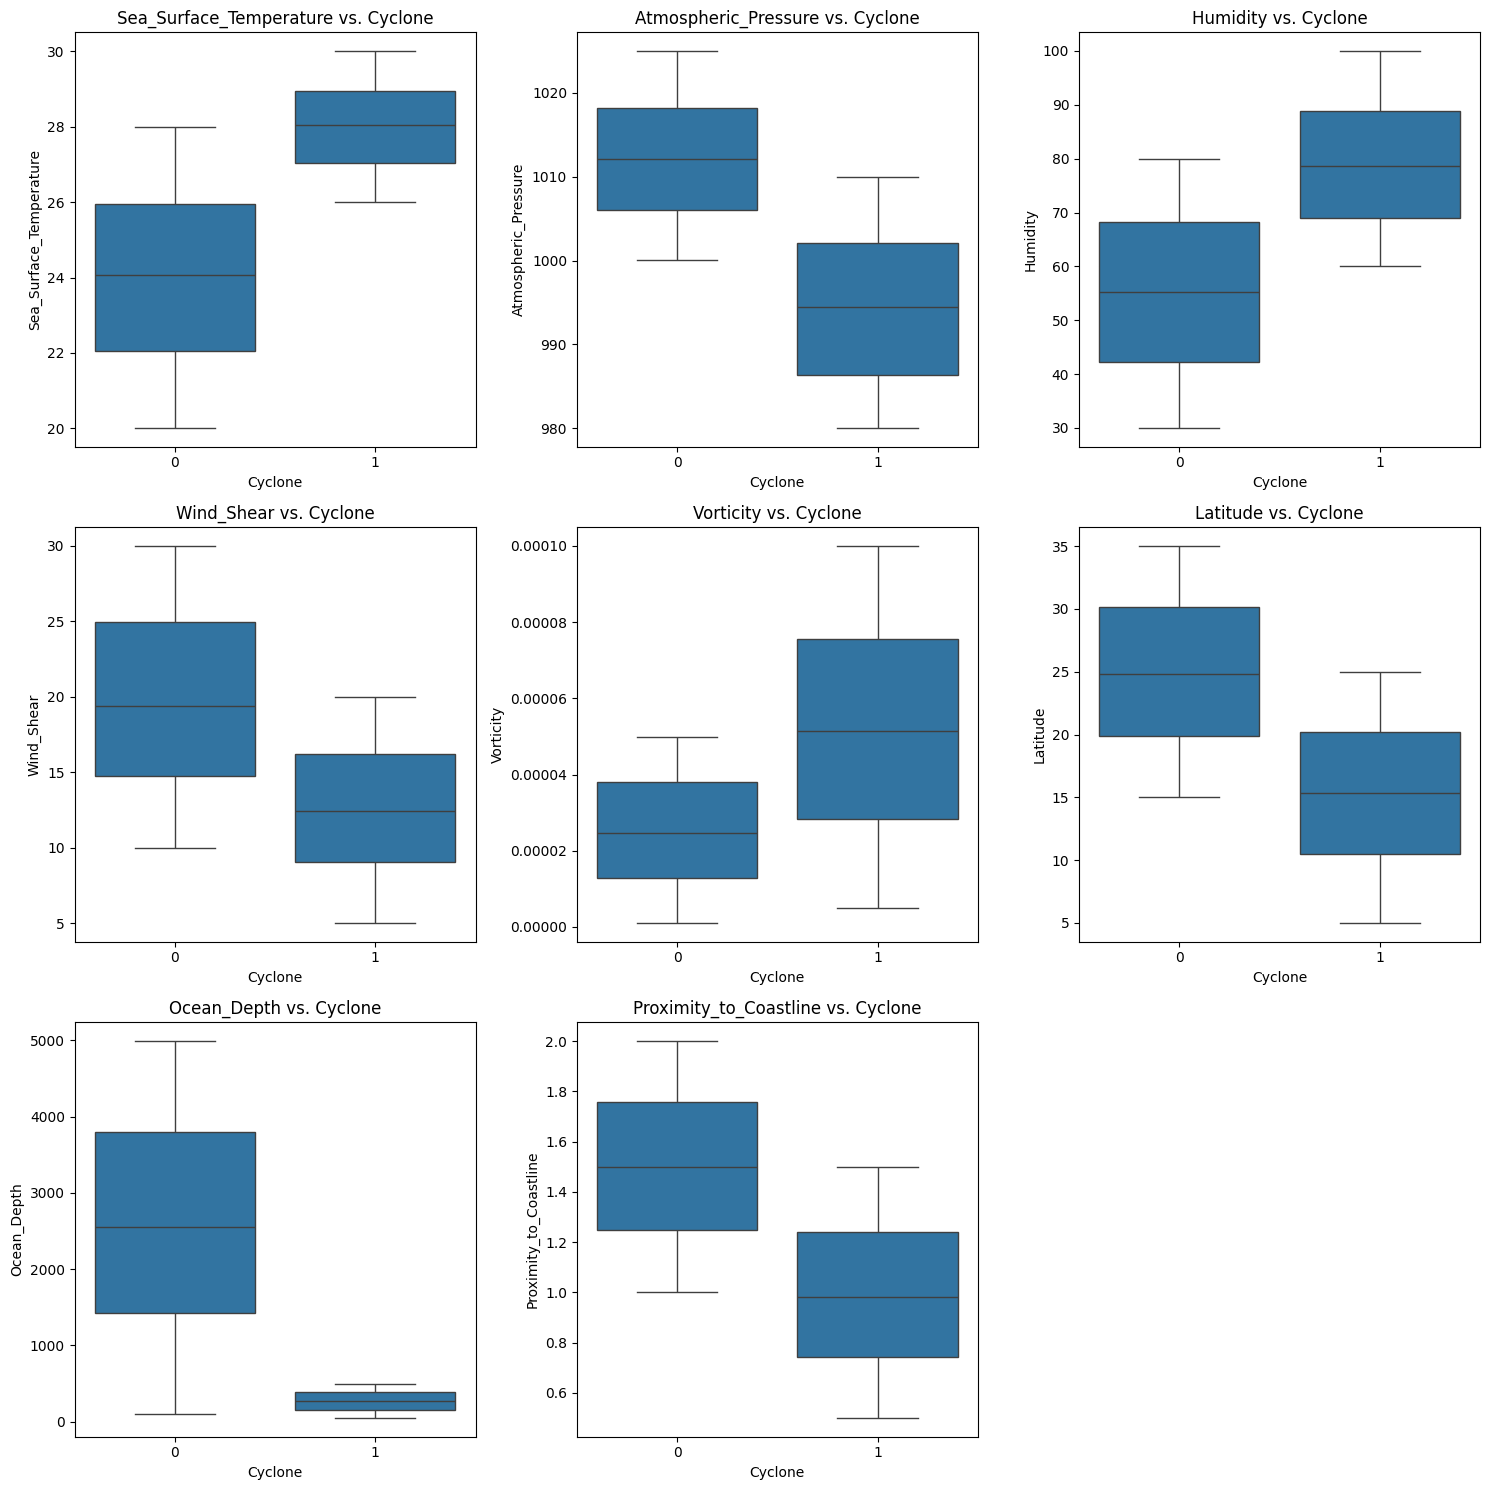

In [16]:
# Bivariate Analysis
num_cols = ['Sea_Surface_Temperature', 'Atmospheric_Pressure', 'Humidity', 'Wind_Shear', 'Vorticity', 'Latitude', 'Ocean_Depth', 'Proximity_to_Coastline']
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x='Cyclone', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs. Cyclone')

# Hide any unused subplots
for j in range(len(num_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

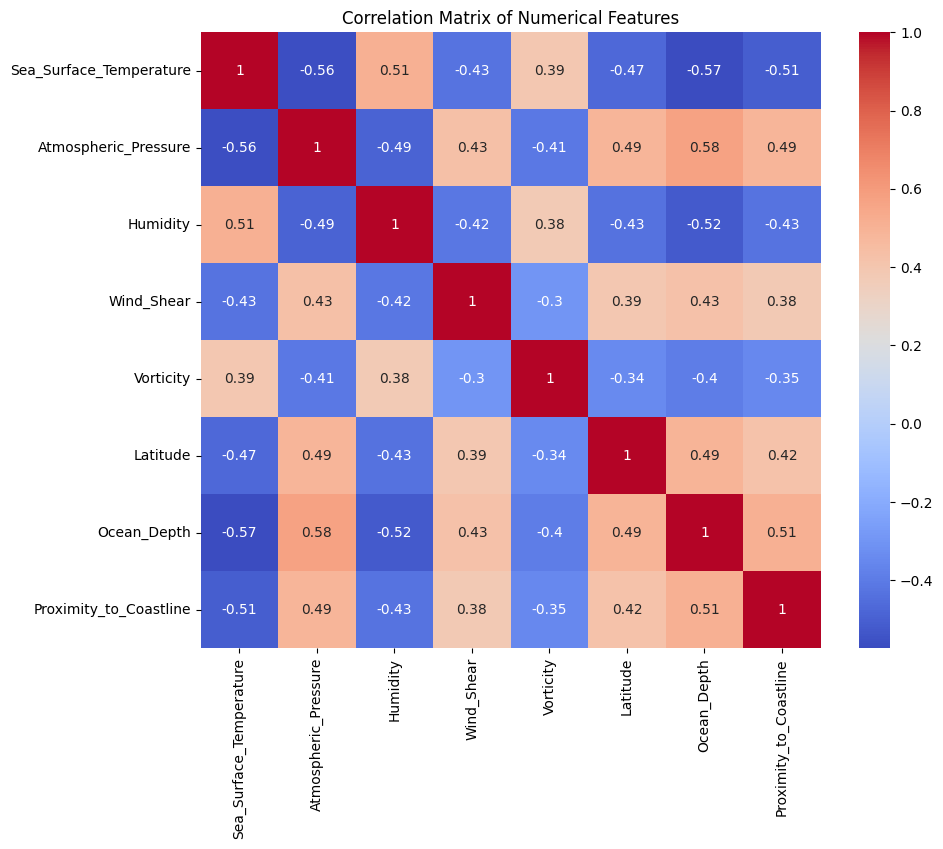

In [17]:
# Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

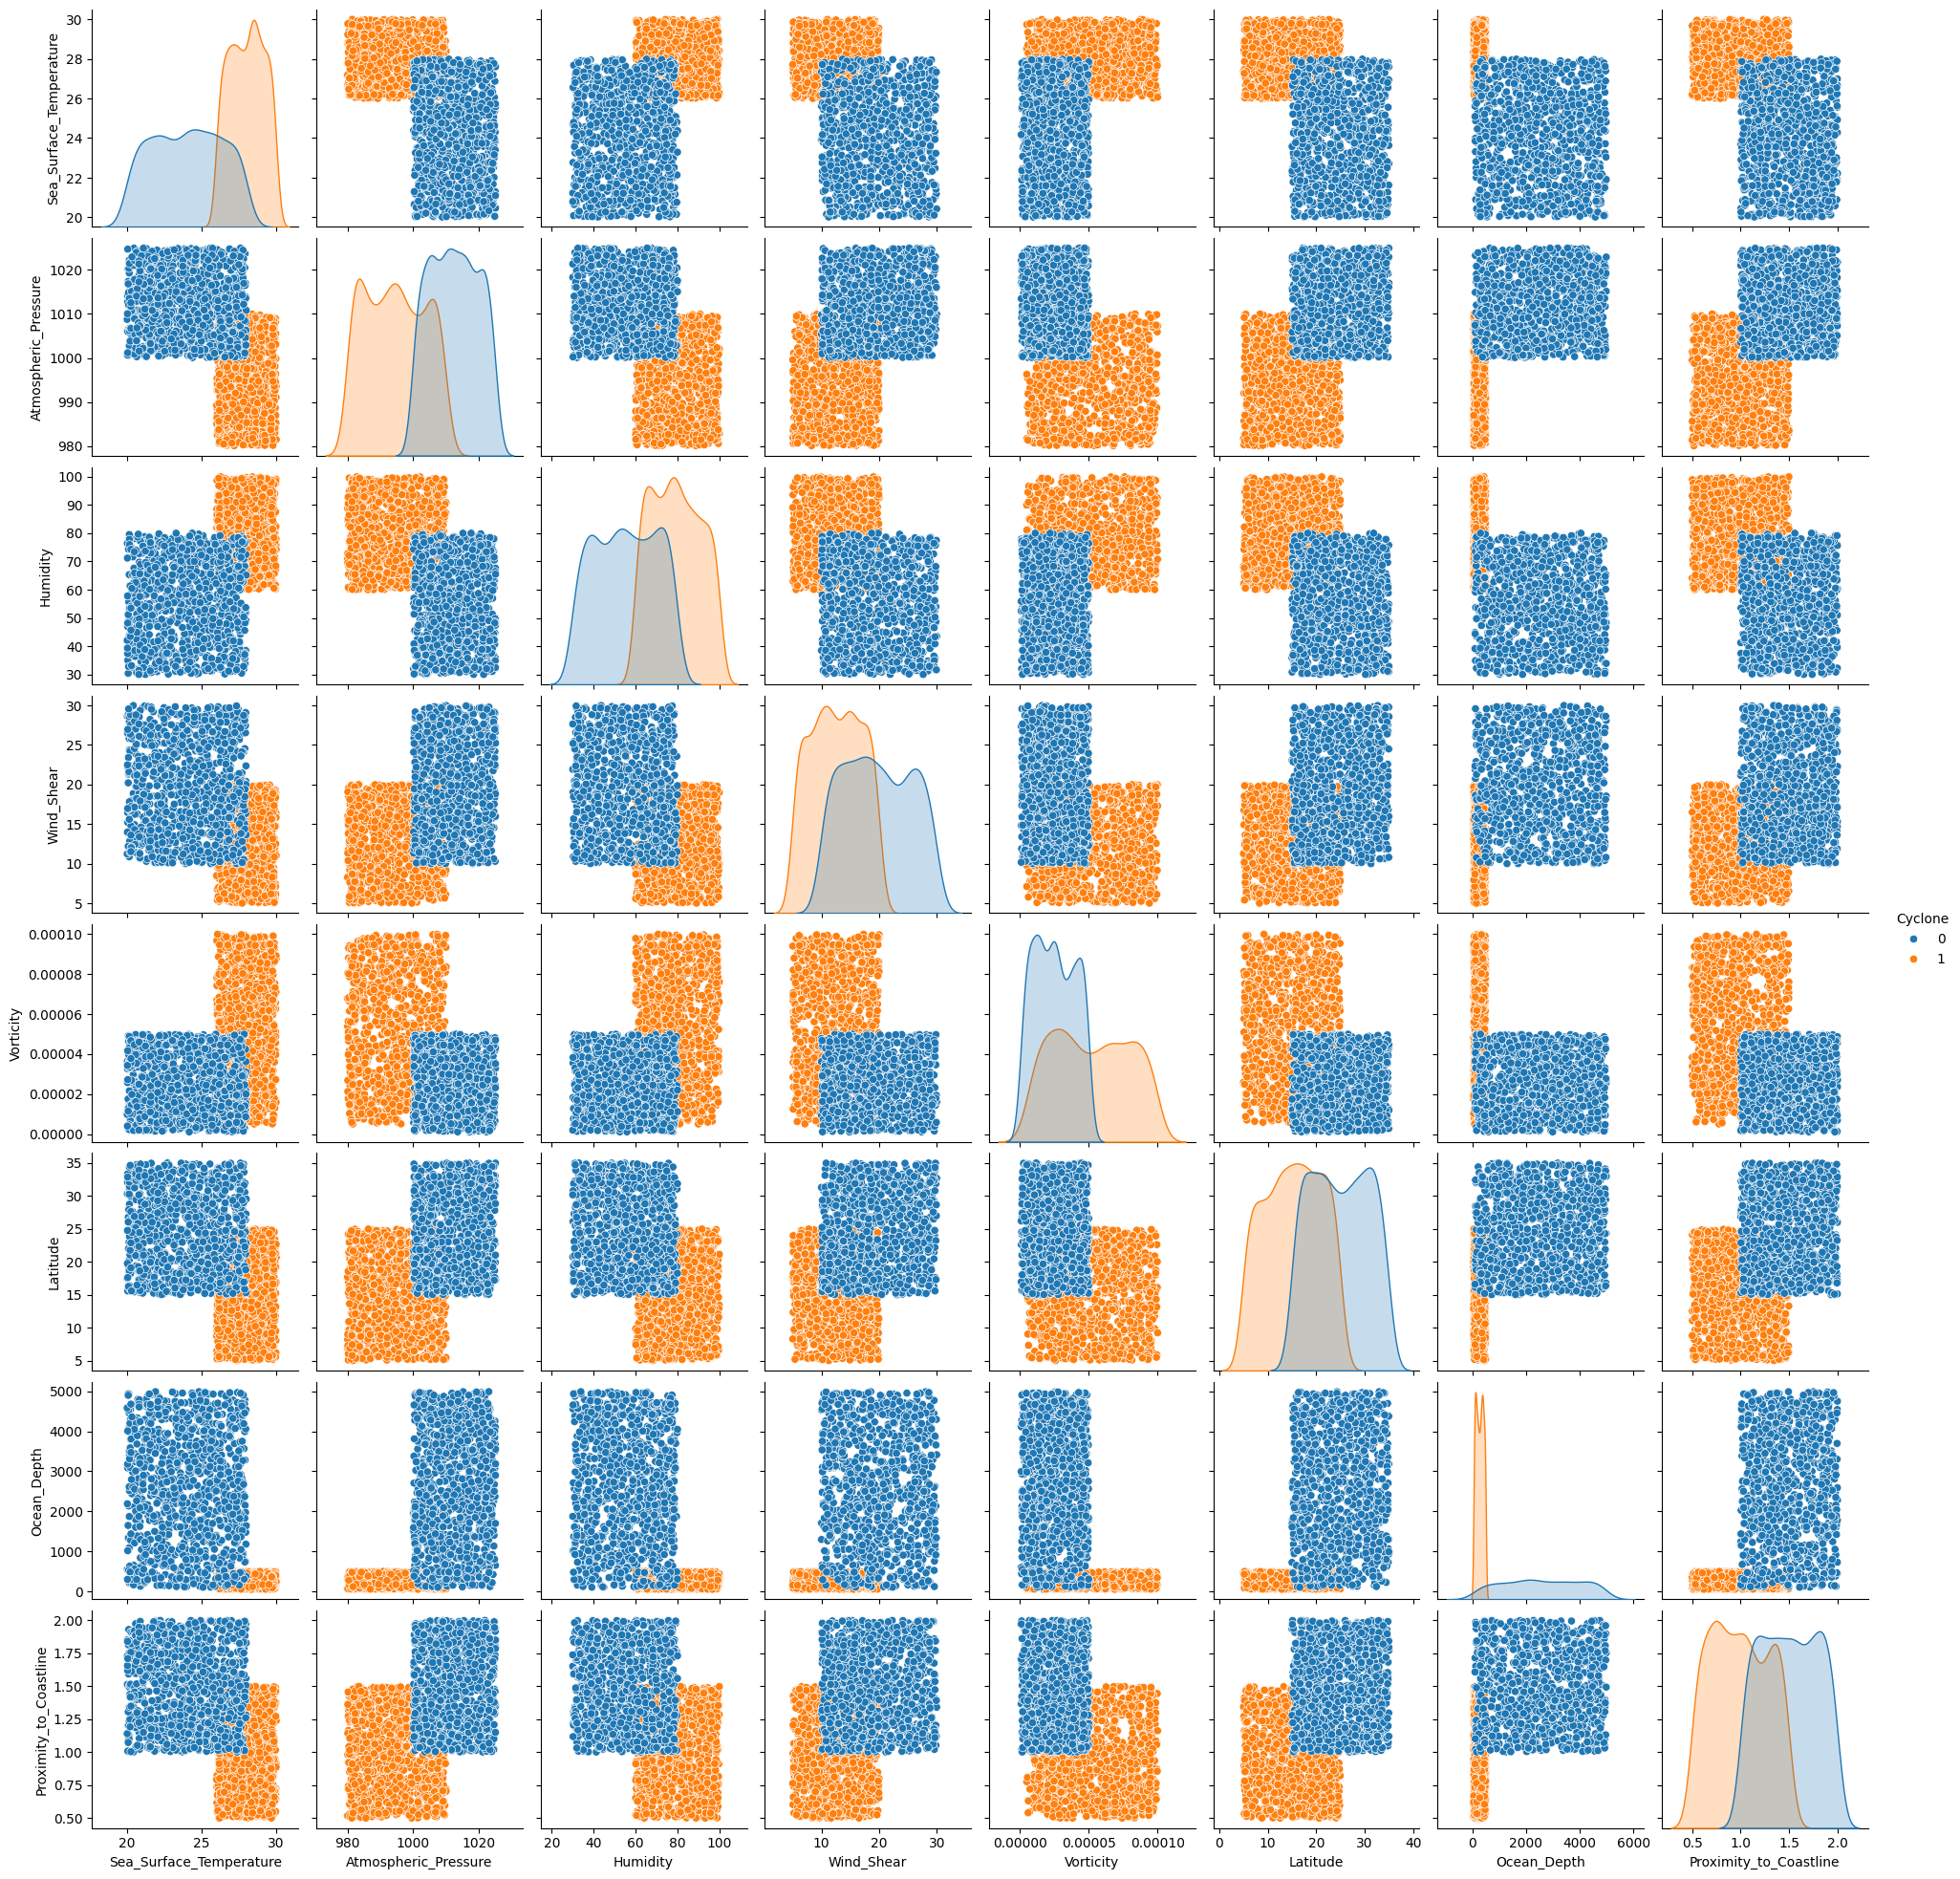

In [18]:
# Pairplot for numerical features colored by Cyclone
sns.pairplot(df, vars=num_cols, hue='Cyclone')
plt.show()

In [19]:
#Preprocess Data

In [20]:
df.columns


Index(['Sea_Surface_Temperature', 'Atmospheric_Pressure', 'Humidity',
       'Wind_Shear', 'Vorticity', 'Latitude', 'Ocean_Depth',
       'Proximity_to_Coastline', 'Pre_existing_Disturbance', 'Cyclone'],
      dtype='object')

In [21]:
print("Unique values in target column before encoding:", df['Cyclone'].unique())
le = LabelEncoder()
df['Cyclone'] = le.fit_transform(df['Cyclone'])
print("Data Head after preprocessing:")
print(df.head())
print("Unique values in target column after encoding:", df['Cyclone'].unique())

Unique values in target column before encoding: [1 0]
Data Head after preprocessing:
   Sea_Surface_Temperature  Atmospheric_Pressure   Humidity  Wind_Shear  \
0                27.498160           1008.521429  89.279758   13.979877   
1                28.404460           1001.242177  60.823380   19.548648   
2                27.216969            995.742693  77.277801    9.368437   
3                27.824280           1003.555279  67.986951   12.713517   
4                26.260206           1008.466566  98.625281   17.125960   

   Vorticity  Latitude  Ocean_Depth  Proximity_to_Coastline  \
0   0.000020  8.119890    76.137625                1.366176   
1   0.000084  9.246782   131.821235                0.683405   
2   0.000063  7.789877   181.465092                0.866362   
3   0.000061  5.929008   323.395183                0.670524   
4   0.000034  6.953442   357.904862                0.940152   

   Pre_existing_Disturbance  Cyclone  
0                         1        1  
1      

In [22]:
# Feature and target selection
X = df.drop('Cyclone', axis=1)
y = df['Cyclone']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1600, 9)
Shape of X_test: (400, 9)
Shape of y_train: (1600,)
Shape of y_test: (400,)


In [23]:
# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
from imblearn.over_sampling import SMOTE

# Balancing data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

print("Shape of X_train after balancing:", X_train_bal.shape)
print("Shape of y_train after balancing:", y_train_bal.shape)

Shape of X_train after balancing: (1602, 9)
Shape of y_train after balancing: (1602,)


In [27]:
from xgboost import XGBClassifier

# Initialize and train XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_bal, y_train_bal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

RandomForestClassifier(random_state=42)


XGBoost Evaluation:

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Classification Report:
              precision    recall  f1-score   support

  No Cyclone       1.00      1.00      1.00       201
     Cyclone       1.00      1.00      1.00       199

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400


Confusion Matrix:


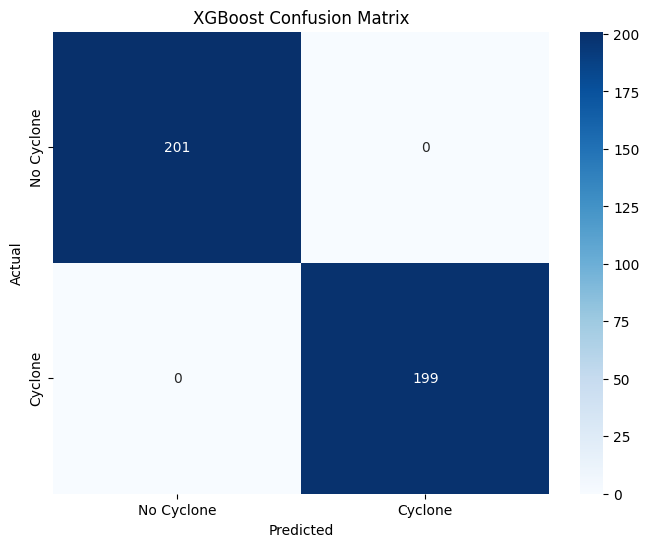


Random Forest Evaluation:

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Classification Report:
              precision    recall  f1-score   support

  No Cyclone       1.00      1.00      1.00       201
     Cyclone       1.00      1.00      1.00       199

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400


Confusion Matrix:


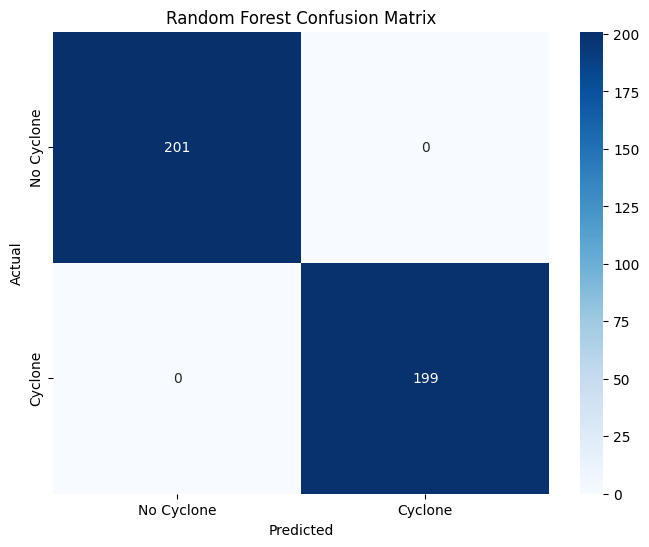

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test,model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted') # Using 'weighted' average for binary classification
    print(f"\n{model_name} Evaluation:")
    print(f"\nAccuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1_score}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Cyclone', 'Cyclone'])) # Adjusted target names for binary classification
    print("\nConfusion Matrix:")
    cm=confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['No Cyclone', 'Cyclone'],yticklabels=['No Cyclone', 'Cyclone']) # Adjusted labels for binary classification
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Evaluate the trained models
evaluate_model(xgb, X_test_scaled, y_test,'XGBoost')
evaluate_model(rf, X_test_scaled, y_test,'Random Forest')

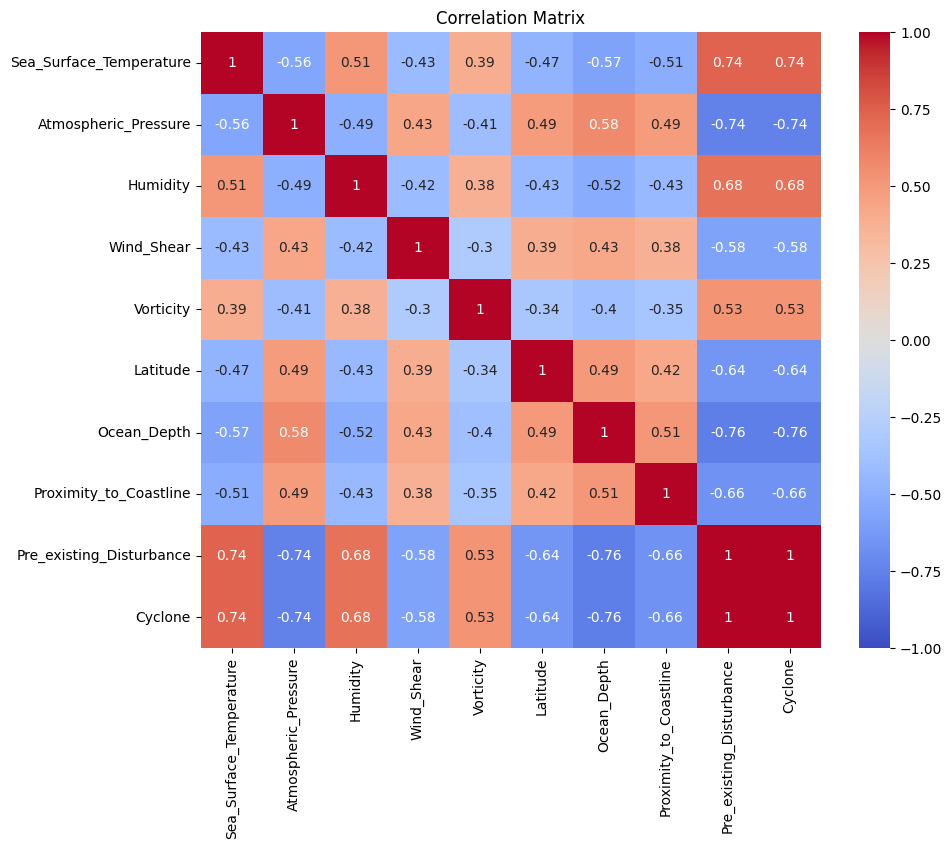

                          Sea_Surface_Temperature  Atmospheric_Pressure  \
Sea_Surface_Temperature                  1.000000             -0.562000   
Atmospheric_Pressure                    -0.562000              1.000000   
Humidity                                 0.510050             -0.493345   
Wind_Shear                              -0.426798              0.431980   
Vorticity                                0.393980             -0.408424   
Latitude                                -0.473197              0.488124   
Ocean_Depth                             -0.573468              0.575849   
Proximity_to_Coastline                  -0.507965              0.488997   
Pre_existing_Disturbance                 0.741450             -0.743838   
Cyclone                                  0.741450             -0.743838   

                          Humidity  Wind_Shear  Vorticity  Latitude  \
Sea_Surface_Temperature   0.510050   -0.426798   0.393980 -0.473197   
Atmospheric_Pressure     -0.4933

In [30]:
df_corr=df.copy()
corr_matrix=df_corr.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1,center=0)
plt.title('Correlation Matrix')
plt.show()
print(corr_matrix)

In [31]:
# Save the trained XGBoost model and scaler
joblib.dump(xgb, 'xgb_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("XGBoost model and scaler saved successfully.")

XGBoost model and scaler saved successfully.
